In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

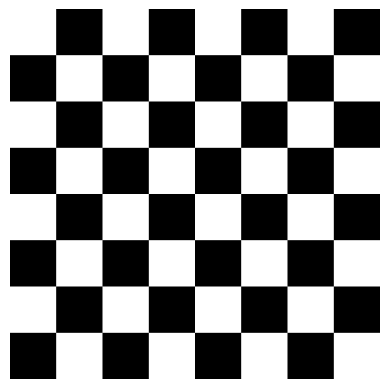

In [6]:
# Câu 1
# Kích thước bàn cờ (số ô vuông)
chessboard_size = 8
# Kích thước mỗi ô vuông (tính bằng pixel)
square_size = 50

# Tạo ảnh trống với kích thước phù hợp, ban đầu ảnh là màu đen (tất cả giá trị là 0)
# Ảnh có 3 kênh màu (RGB), mỗi ô vuông có chiều cao và chiều rộng bằng square_size * chessboard_size
img = np.zeros((chessboard_size * square_size, chessboard_size * square_size, 3), dtype=np.uint8)

# Duyệt qua từng ô vuông của bàn cờ
for row in range(chessboard_size):
    for col in range(chessboard_size):
        # Kiểm tra xem ô vuông hiện tại là trắng hay đen
        if (row + col) % 2 == 0:
            # Xác định tọa độ của góc trên bên trái và góc dưới bên phải của ô vuông
            top_left_x = col * square_size
            top_left_y = row * square_size
            bottom_right_x = (col + 1) * square_size
            bottom_right_y = (row + 1) * square_size

            # Vẽ ô vuông trắng (màu [255, 255, 255]) lên ảnh
            img[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = [255, 255, 255]

plt.imshow(img)
plt.axis('off')

C:\Users\Trung Tin\AppData\Local\Temp\ipykernel_4948\2602915083.py:23: RuntimeWarning: overflow encountered in scalar add
  gray_value = int((r + g + b) / 3)


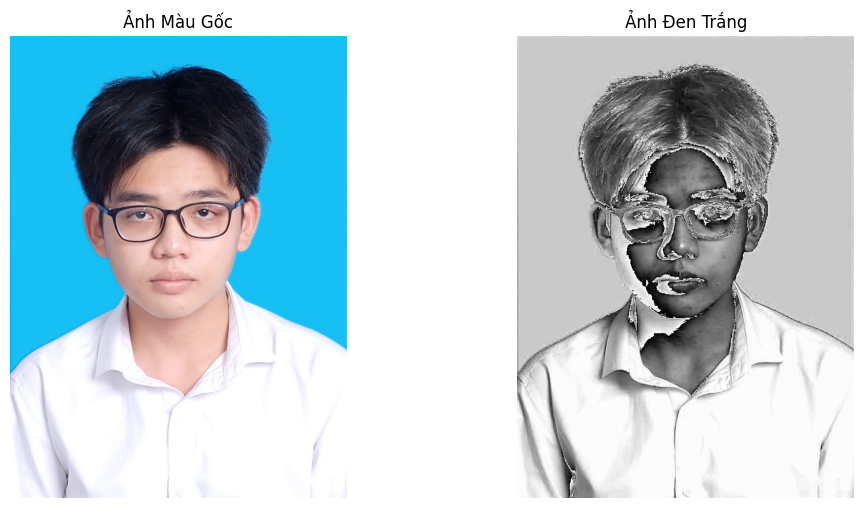

In [7]:
# Câu 2
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    # Lấy chiều cao, chiều rộng và số kênh màu của ảnh
    height, width, channels = image.shape

    # Tạo một mảng mới có cùng chiều cao và chiều rộng với ảnh ban đầu để lưu ảnh đen trắng
    # Ban đầu ảnh đen trắng sẽ là màu đen (tất cả giá trị là 0)
    image_gray = np.zeros((height, width), dtype=np.uint8)

    # Duyệt qua từng pixel của ảnh
    for i in range(height):
        for j in range(width):
            # Lấy giá trị của từng kênh màu R, G, B
            r = image[i, j, 0]
            g = image[i, j, 1]
            b = image[i, j, 2]

            # Tính giá trị độ sáng bằng cách trung bình cộng các giá trị R, G, B
            gray_value = int((r + g + b) / 3)

            # Gán giá trị độ sáng cho pixel tương ứng trên ảnh đen trắng
            image_gray[i, j] = gray_value

    # Hiển thị ảnh gốc và ảnh đen trắng
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Ảnh Màu Gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Ảnh Đen Trắng")
    plt.axis('off')

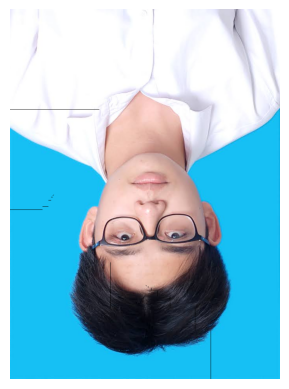

In [8]:
# Câu 3
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    (h, w) = image.shape[:2]
    
    # Xác định góc xoay và tính toán tâm của hình ảnh
    angle = 180
    center = (w // 2, h // 2)
    angle_rad = np.deg2rad(angle)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    
    # Khởi tạo ảnh mới với kích thước đủ lớn để chứa ảnh sau khi xoay
    new_w = int(abs(h * sin_a) + abs(w * cos_a))
    new_h = int(abs(h * cos_a) + abs(w * sin_a))
    rotated_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    # Tâm mới của ảnh sau khi xoay
    new_center = (new_w // 2, new_h // 2)
    
    # Duyệt qua từng pixel và gán giá trị cho ảnh mới sau khi xoay
    for y in range(h):
        for x in range(w):
            new_x = int((x - center[0]) * cos_a + (y - center[1]) * sin_a + new_center[0])
            new_y = int(-(x - center[0]) * sin_a + (y - center[1]) * cos_a + new_center[1])
            
            if 0 <= new_x < new_w and 0 <= new_y < new_h:
                rotated_image[new_y, new_x] = image[y, x]
    
    plt.imshow(rotated_image)
    plt.axis('off')

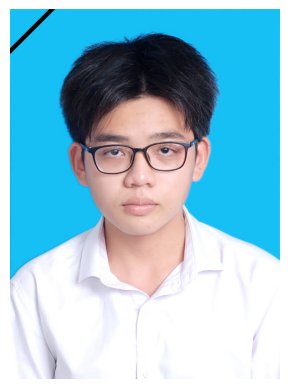

In [9]:
# Câu 4
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
# Tạo một bản sao của ảnh
    image = np.copy(image)
    # Xác định độ dày của đường thẳng
    line_thickness = 15
    # Xác định điểm bắt đầu
    start_point = image.shape[1] // 6

    for i in range(line_thickness):
        for j in range(min(image.shape[0], start_point)):
            if start_point - j - i >= 0:
                image[j, start_point - j - i] = [0, 0, 0]
    plt.imshow(image)
    plt.axis('off')

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

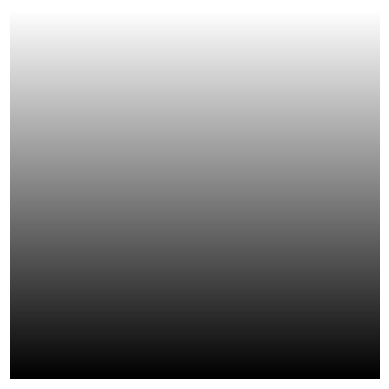

In [10]:
# Câu 5
# Đặt kích thước hình ảnh
width, height = 256, 256

# Tạo một ma trận hình ảnh với kích thước đã định
gradient_image = np.zeros((height, width), dtype=np.uint8)

# Tạo gradient từ trắng đến đen
for y in range(height):
    # Tính giá trị xám từ 255 (trắng) đến 0 (đen)
    gray_value = int(255 * (1 - y / height))
    gradient_image[y, :] = gray_value

# Hiển thị hình ảnh
plt.imshow(gradient_image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(499.5), np.float64(-0.5))

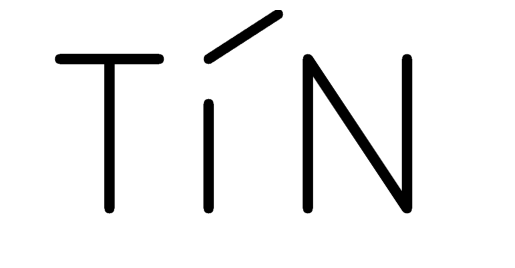

In [11]:
# Câu 6
# Kích thước hình ảnh
height, width = 500, 1000

# Tạo hình ảnh trắng
image = np.ones((height, width), dtype=np.uint8) * 255

def draw_line(img, start_point, end_point, color, thickness):
    cv2.line(img, start_point, end_point, color, thickness)

def draw_T(img):
    color = (0, 0, 0)
    thickness = 20
    # Đường ngang trên cùng
    draw_line(img, (100, 100), (300, 100), color, thickness)
    # Đường thẳng đứng
    draw_line(img, (200, 100), (200, 400), color, thickness)
    return img

def draw_I(img):
    color = (0, 0, 0)
    thickness = 20
    # Đường thẳng đứng
    draw_line(img, (400, 190), (400, 400), color, thickness)
    return img

def draw_N(img):
    color = (0, 0, 0)
    thickness = 20
    # Đường thẳng đứng 1
    draw_line(img, (600, 100), (600, 400), color, thickness)
    # Đường chéo
    draw_line(img, (600, 100), (800, 400), color, thickness)
    # Đường thẳng đứng 2
    draw_line(img, (800, 100), (800, 400), color, thickness)
    return img

def draw_DauSac(img):
    color = (0, 0, 0)
    thickness = 20
    # Đường chéo
    draw_line(img, (400, 100), (540, 10), color, thickness)
    return img

image = draw_T(image)
image = draw_I(image)
image = draw_N(image)
image = draw_DauSac(image)

plt.imshow(image, cmap='gray')
plt.axis('off')

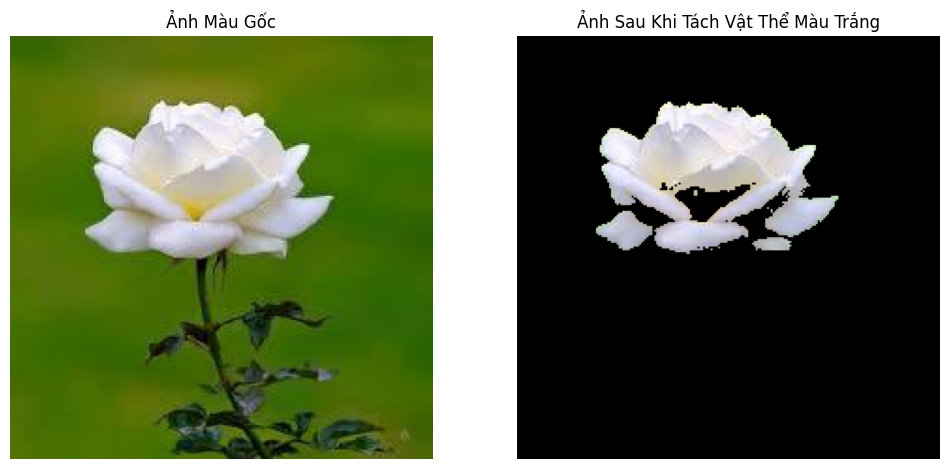

In [12]:
# Câu 7
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\whiteRose.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    # Lấy chiều cao, chiều rộng và số kênh màu của ảnh
    height, width, channels = image.shape

    # Tạo một mảng mới có cùng chiều cao, chiều rộng và số kênh màu với ảnh ban đầu để lưu ảnh kết quả
    result_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Đặt ngưỡng cho màu trắng
    threshold = 160

    # Duyệt qua từng pixel của ảnh
    for i in range(height):
        for j in range(width):
            # Lấy giá trị của từng kênh màu R, G, B
            r = image[i, j, 0]
            g = image[i, j, 1]
            b = image[i, j, 2]

            # Kiểm tra xem pixel đó có phải là màu trắng (R, G, B đều lớn hơn ngưỡng)
            if r > threshold and g > threshold and b > threshold:
                # Nếu pixel này được coi là thuộc vật thể màu trắng, giữ nguyên giá trị RGB của nó
                result_image[i, j] = image[i, j]
            else:
                # Ngược lại, gán giá trị là 0 (màu đen)
                result_image[i, j] = [0, 0, 0]

    # Hiển thị ảnh gốc và ảnh kết quả
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Ảnh Màu Gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result_image)
    plt.title("Ảnh Sau Khi Tách Vật Thể Màu Trắng")
    plt.axis('off')

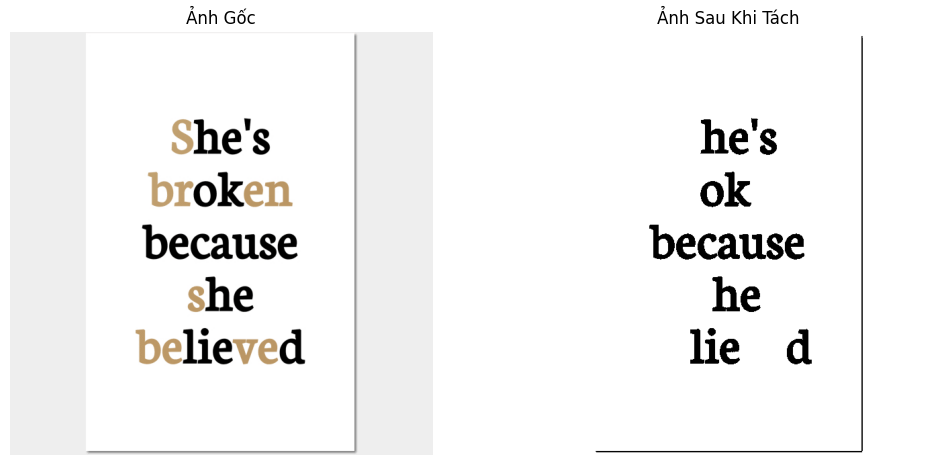

In [13]:
# Câu 8
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\SheBroken.jpg'
image = plt.imread(image_path)
if image is None:
    print("Không thể đọc ảnh. Vui lòng kiểm tra lại đường dẫn.")
else:
    # Lấy chiều cao, chiều rộng và số kênh màu của ảnh
    height, width, channels = image.shape

    # Tạo một mảng mới có cùng chiều cao, chiều rộng và số kênh màu với ảnh ban đầu để lưu ảnh kết quả
    result_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Đặt ngưỡng cho màu sắc
    threshold = 150

    # Duyệt qua từng pixel của ảnh
    for i in range(height):
        for j in range(width):
            # Lấy giá trị của từng kênh màu R, G, B
            r, g, b = image[i, j]

            # Nếu tất cả các giá trị màu nhỏ hơn ngưỡng, chúng ta giả sử đó là phần màu đen của văn bản
            if r < threshold and g < threshold and b < threshold:
                result_image[i, j] = [0, 0, 0]  # Giữ màu đen
            else:
                # Ngược lại, gán giá trị là 255 (màu trắng) để tách các phần khác
                result_image[i, j] = [255, 255, 255]

    # Hiển thị ảnh gốc và ảnh kết quả
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Ảnh Gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result_image)
    plt.title("Ảnh Sau Khi Tách")
    plt.axis('off')